# COGS 118A - Final Project

Music Genre Classification with Random Forests and Support Vector Machines

## Group members

- Abraham Torok
- Rohil Ahuja
- Brinda Narayanan
- Jorge Acevado

# Abstract 

Our goal is to create a multi-class classification model to determine the genre of novel songs based on our database called music genre classification, consisting of roughly 18,000 songs described with 15 numerical features. The original dataset was used in an online Hackathon. After exploring the data, we will be using a Random Forest model to classify our data. We selected a random forest as one of our models, as it has the capacity to handle high-dimensional data with many numerical features. We will also use an SVM as a separate model to compare the accuracy between different types of multiclass models. Our performance will be measured by looking at the accuracy scores of both models, as well as the F1 scores for both models. Through our project, we created a Random Forest classifier, which is able to classify songs into the proper genre ~54% of the time, and a Support Vector Machine, which is able to classify songs into the proper genre about ~56% of the time. The project revealed an important aspect of music genre classification; with some slightly more ambigious songs, complex relationships between certain variables can be formed, leading to frequent misclassification, and a need for more, high-dimensional data. Despite this, our model was still able to classify far more accurately than random chance. 

# Background

With the onset of streaming services such as Spotify and Apple Music, people are constantly listening to music and trying to expand their music taste. As access to music has increased, classification between different genres of music has become much more important to the general population as the number of genres increase. There are 10 major classifications of music: <br>
1. Pop
2. Rock
3. Indie Rock
4. EDM
5. Jazz
6. Country
7. Hip Hop & Rap
8. Classical Music
9. Latin Music
10. K-pop <a name = 'analyticsteps'></a>[<sup>[1]</sup>](#analyticstep).
<br>

Using machine learning to help classify music genres is a relatively new concept, but is something that has been shown to have great potential, especially in the realm of recommendations. Previous work to classify into different categories has been done with different types of models, such as one example with a convoluted neural network. This particular method used audio signals to determine the genre. The particular dataset that was used contained a csv with many different quantifications of the particular song, as well as an audio recording of that song. From the audio recording, they examined the wav graphs in conjunction with the numerical data. From this data they constructed their classifier which worked with 92.93% accuracy. <a name = 'clairvoyant'></a>[<sup>[2]</sup>](#clairvoyant). <br>

From Kaggle, we can also see many other projects that were completed. These projects use different types of machine learning models in order to classify the different songs into genres. One of the algorithms did some clustering using PCA and TSNEs to cluster the data into different points. Another algorithm used a random forest to classify the different songs into genres. All of these different methods had high accuracy, and developed a recommendation system once the model was trained and complete to recommend songs to users <a name="kaggle"></a> [<sup>[3]</sup>](#kaggle).


# Problem Statement

Our problem revolves around classifying songs into different music genres. For many listeners of music, a large issue is discovering new music that fits into genres the user is interested in. Users do not want to have to listen to many new songs in order to just find music in their genre, then narrowing down even further into music that fits their taste. By creating a classifier that can group music into different genres, we can help create better music recommendations for users looking to discover new songs. We will be comparing different types of models, specifically a random forest model and a support vector machine, and training both of them to do the classification of new songs. <br>

Given many different numerical measures of a song such as loudness, acousticness, and instrumentalness, we can classify a new song into one of our pre-existing labels from the training data. All these observations should be easily measurable, simply through the song itself, using particular 3rd-party tools to extract the data from a new song. Because the measurements are all taken directly from the songs, they should be very easy to replicate as well. As there are many different softwares, the data could be slightly different between different types of software, but most should be negligible noise.  In addition, the problem is quantifiable because we can use the error metrics (F1 Score and Log Loss) to quantify the performance of a model for music genre classification.

# Data


Dataset link: https://www.kaggle.com/datasets/purumalgi/music-genre-classification?select=train.csv

The Dataset comes from a MachineHack Hackathon in which 15 numeric features are provided for each song along with an artist name and title. The data is already split into training and testing csvs, with ~18000 observations in the training set and ~7,700 observations in the testing set. The features for each observation consist of quantitative variables such as key, tempo, time signature, as well as qualitative variables such as liveness, danceability, and speechiness. The data is already quite clean, with minimal missing data and all fields are numerical, so pre-processing will be minimal. We employed the simple imputer from sklearn to replace missing values with the column mean. 
Some critical variables of our dataset is the Class which is our target variable and represents the music genre in numerical format (eg 1 for rock, etc) The instrumentation variables are also critical as they help train the data, and these variables (danceability, acousticness, etc) are also represented numerically.



During our explorating of the data, it became apparent that some of our features such as speechiness and instrumentalness had an exponential distribution, and in order to normalize these features and reduce the skew, we performed a log transformation.

## Features Pre-Transformation
skew: 1.53 and 3.0 respectively
![pretransform_feature.png](./pretransform_feature.png)


## Features Post-Transformation
skew: -0.2 and 1.16 respectively
![posttransform_features.png](posttransform_features.png)
This transformation has drastically reduced the skew of our data and should provide better results in the final classifier model.

Additionally, we observed that two of our variables, 'key' and 'time', while initially appearing to be quanitative, were actually categorical. When examining the data, there was no relationship between the numbers for these variables; a 'key' of 8 was not necessarily double of a 'key' of 4. To address this, we one hot encoded these variables, so that we could model them as categorical variables as opposed to quantitative variables.

# Proposed Solution

Some possible solutions to the problem of classifying songs into different music genres is to use machine learning algorithms to automatically learn patterns and characteristics of different genres based on their audio features. Two such algorithms are the Support Vector Machine (SVM) classifier and the Random Forest classifier.

To apply either of the algorithms to our dataset of roughly 18,000 songs and 15 numerical features, we would first need to perform some data preprocessing. In this step, we need to preprocess the data by extracting relevant features from the songs. Some of these include danceability, energy, key signature, loudness, acousticness, tempo, etc. Extracting these features allows us to compare the songs and helps in classifying the genres.

Next, we perform data splitting. For this we need to split the dataset into training, validation, and testing sets. The training set is used to train the classifiers, while the validation set is used to tune the hyperparameters of the model. Finally, the testing set is used to evaluate the performance of the trained classifier. 

To train our model using the random forest algorithm we will use the 15 numerical features as input and the genre label as the output. The model would be optimized by tuning hyperparameters such as the number of trees in the forest and the maximum depth of each tree. In training the SVM classifier, we will experiment with different kernel functions and tune the hyperparameters using techniques like cross-validation to find the optimal kernel coefficient and regularization parameter.

To implement the solution, we can use Python and the scikit-learn library, which offers an implementation of the SVM and random forest classifiers. We could use train_test_split from the same library to split the dataset into training and testing sets. The preprocessing of the data could be done using the StandardScaler function from the scikit-learn library.

# Evaluation Metrics

Some evaluation metrics we can employ are the f1 metric for each One vs. Rest classifier as well as the recommended Log Loss Metric that was used in the original scoring of the model accuracy during the competition this dataset was originally intended for. Another possible metric we can use is accuracy.

F1 Score = F1 score = 2 * (precision * recall) / (precision + recall)

Log Loss:

![log_loss_eqn.png](./log_loss_eqn.png)

Accuracy = (True Negatives + True Positives) / (True Negatives + False Negatives + True Positives + False Negatives)

F1 score is a balanced measure of precision and recall, providing an overall measure of the model's accuracy. We will use a weighted F1 score in order to account for the uneven distribution of class labels in our dataset. The weighted F1 score will scale the score for each class by the number of observations. A high F1 score means that the model is accurately classifying instances as positive, while also minimizing the number false positives and false negatives. In the context of our problem statement, a high F1 score means that our model is accurately classifying songs into different genres, while also minimizing the risk of recommending songs that do not fit the user's preferred genres.

Log loss measures the difference between the predicted probabilities of each class and the true probabilities, where a lower log loss value indicates better performance. Log loss takes into account not only the correctness of the predicted class but also the confidence in the prediction, which can be important in cases where some classes are more similar to each other than others. In the context of our problem statement, log loss would provide a more nuanced understanding of the performance or our model by considering the probability distribution of the predicted classes. A low log loss value would indicate that the model is accurately predicting the probabilities of each class, which is importnant for providing users with relevant and diverse music recommendations.

Accuracy is the most straigntforward metric for evaluating classification models, as it simply measures the proportion of correct predictions out of all predictions made. In the context of our problem statement, accuracy tells us the percentage of correctly classified songs out of all the songs that were classified. This metric is important because it directly reflects the user experience - the higher the accuracy, the more likely users will find music in the genres they are interested in.

Ultimately, we decided to focus on accuracy and F1 score as our primary evaluation metrics because they are easier to interpret and more directly relevant to our problem statement. We believe that accurately classifying songs into their respective genres is the most important aspect of our problem, and accuracy and F1 score are well-suited to evaluate this performance.

# Results

### Background and Model Selection

To quickly summarize, our dataset contains different measures of a song, and classifies it into a particular genre, represented by a numerical value. After examining our dataset, and performing the necessary steps to format the data in a way that it is usable for our project, we moved towards our model selection. There were two models that came to mind, the first being Support Vector Machines, and the second being Random Forests. For this problem, we thought that Support Vector Machines would be appropriate because this dataset does not have high-dimensionality, and SVMs are very flexible to non-linear data, due to the use of kernels. We additionally thought that the robustness to noise that SVMs have would be highly beneficial with data relating to audio, working with processing softwares could easily incorporate noise into the dataset, which could be handled by the classifier. The second model we decided to select was the Random Forest classifier, in part due to its flexibility. Having some categorical variables and many numerical variables, we thought a Random Forest model would be a great way to model the data we had. In addition, because of the various features we have, using a Random Forest model could help us identify the importance of certain features, a trait that could aid us in the training of the final model. 

Linear Regression was one model we chose not to use, because our data was not linearly separable. Logistic Regression was another model we chose not to use due to the non-binary nature of classifcations that we had. With 10 different genres to predict, using Logistic Regression was impractical. We considered using a Neural Network to attemtpt to classify the different songs into music genres. After considering, a few different factors, we felt as though a Neural Network was not the best method we could use to solve the problem at hand. One of these factors was that while the data was large, with over 17,000 observations, it was not extremely large, to where the computational intensity and resources required by a Neural Network would be negligible, as its performance would be far better than other models. The relationships in this dataset, are complex, but not overly complex to the point where other, less intense algorithms would be worse performers than a Neural Network. Finally, with the complex of a Neural Network, our final model could be more prone to overfitting, giving us an inaccurate classifier. 

Given these factors, we decided to select two methods, Support Vector Machines, and Random Forests. 

### Feature Selection and Data Processing

After selecting which types of models we would have liked to use, we needed to perform some basic pre-processing of the data to make it usable for us. As mentioned in some of the sections before, noticing that some of our features were highly skewed, we performed a log transformation on the 'instrumentalness' and the 'speechiness' of the songs, in order to make the data more normally distributed and lower the skew, for the purpose of training our model more effectively. 

For the both models, we additionally One-Hot Encoded the 'key' and 'time signature' variables. For 'time signature', the initial dataset presented 'time signature' as a column with discrete numerical data, but upon our further investigation, we found that these variables were truly categorical. Because there is not one time signature that is 'greater' than another, it was helpful to one-hot encode this feature to be better interpreted by the model. With 'key', we found that this was also true. For example, a 'key' of 8 is not double the value of a key of 4, but rather both 8 and 4 represent distinct categories.

Finally, we performed a Grid Search for cross-validation. 

For the SVM: 

![SVMCV_code.png](./SVMCV_code.png)

Which returned the following results:

![SVMCVresult.png](./SVMCVresult.png) 

For the Random Forest:

![RFCV_result.png](./RFCV_result.png)

Which returned the following results:

![RF_bestparams.png](./RF_bestparams.png)

In order to initially parse through our data and understand the importance of certain features within the context of our model, we performed a permutation feature selection on both of the model types. The results for Random Forests is as follows: <br>

![random_forestFS.png](./random_forestFS.png)

For SVM: <br>

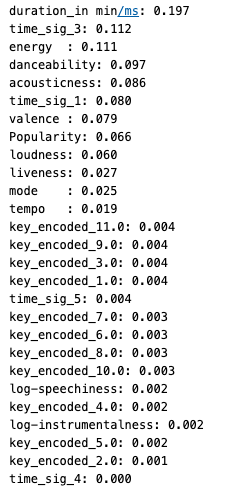

### Base Model

Once we had all our preliminary feature selection results, we aimed to train a base model and measure its efficacy.

For the SVM: First, we dropped some features that we determined were irrelevant for the training of our model. These inlcuded the features "Artist's Name", and "Track Name" becuase they don't provide information in an interpretable format for a support vector machine. Then, we performed a Train/Test split of 0.75/0.25 on our data and used the training split to train a Support Vector Classifier with a C regularization parameter of 1.0 in order to classify the data into the 10 different classes. We utilized StandardScaler and SimpleImputer from the sklearn library to prepare the data for training which scaled the data and replaced missing values in each column with the mean of that column.

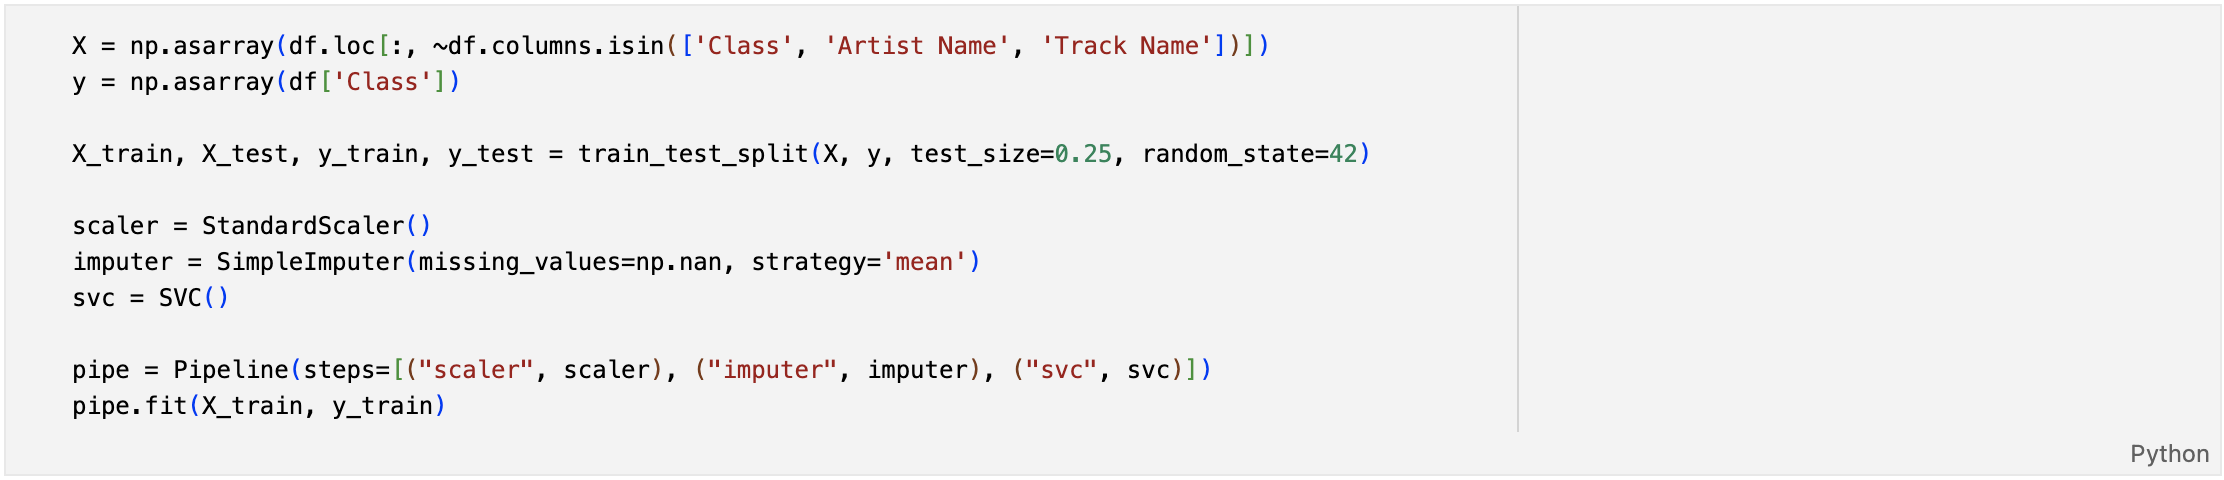

This baseline model gave us an accuracy score of 53.1%.

For the Random Forest: We performed a Train/Test split of 0.8/0.2, and trained a Random Forest model to attempt to classify the test data into their own classes. Using a simple imputer, where the strategy is mean, we replaced all the missing values within each column. We then used a StandardScaler to scale the data and prepare it for training using the Random Forest. In the basic Random Forest model, we fit the model using 500 trees, a maximum depth of 10 for each tree, with a minimum of 5 samples required to split an internal node. The minimum samples required to be at a leaf node in this classifier was 3, and the number of features to consider when looking at the best split was set to the total number of features. 

![RF_baseline.png](./RF_baseline.png)

After training the model on this data, our baseline model performed with an accuracy score of 52.2%. 

### Tuned Model

From here, we progressed into more fine-tuned models, using much of what we discovered and discussed in Subsection 2.

For the SVM: Here, we left out the same features of the data that we did for the base SVM model. Additionally, we carried out a log transformation on the features "instrumentalness" and "speechiness" in order to reduce the skew of each of these features and provide better performance. We also One-Hot encoded the categorical features "time_signature" and "key" to allow the SVM classifier to treat each category as a seperate feature and help the detection of patterns and relationships of those categories with other features. This time, however, we did a Train/Test split of 0.8/0.2 to give the model more data to learn from and so it is able to create more representative patterns and relationships. Next, we performed a grid search over the following parameters with values: C regularization (0.1, 1, 10, 100), kernel type (linear, rbf, poly, sigmoid), class weight (none, balanced), max iterations (1000, 10000), and simple imputer strategy (mean, median, mode). For each combination, the same StandardScaler was used as in the base model. After the grid search was completed, we discovered that the best paramters were as follows: C regularization: 1.0, Kernal type: RBF, class weight: none, max iterations: 10000, and a 'mean' imputation strategy.

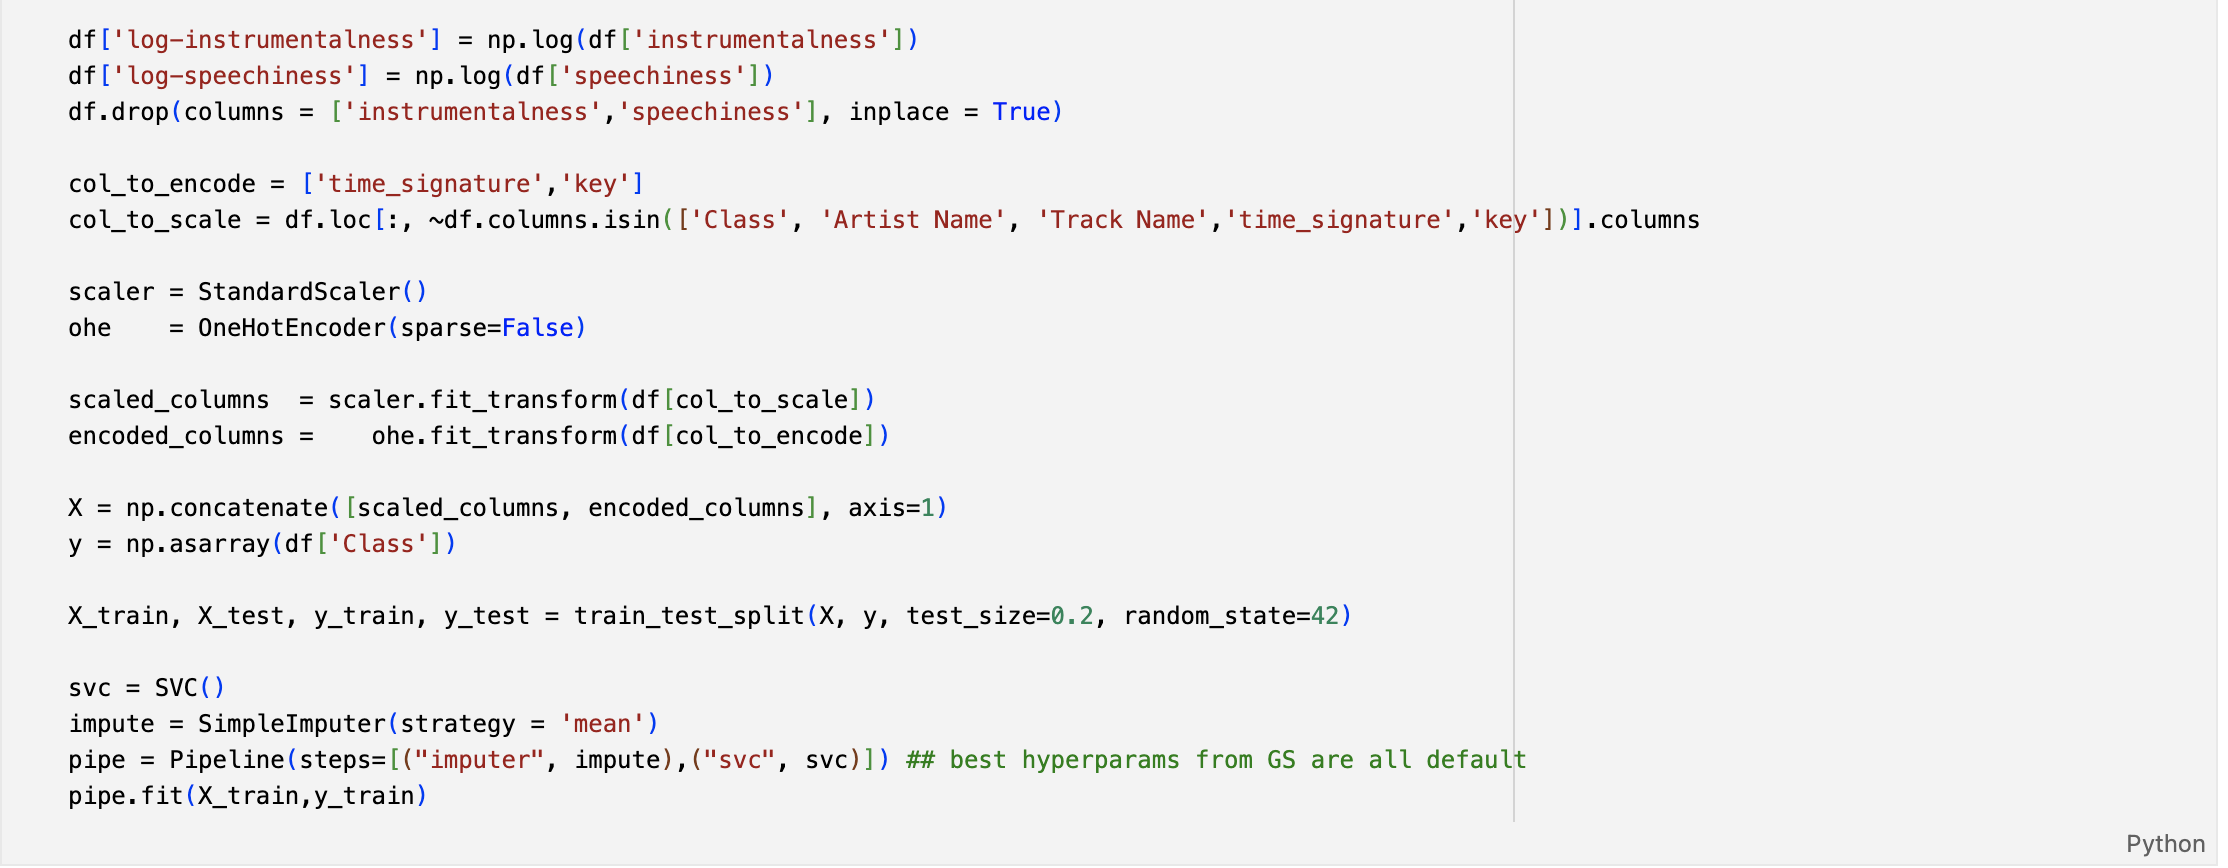

Our newly trained model produced an accuracy score of 55.8%.

For the RF: This time, we created a Train/Test split of 0.75/0.25, and performed some of the selection on the data that we discussed earlier. First, we log transformed two of the columns, the "instrumentalness" and the "speechiness." After doing this, we removed certain features that were useless, and could be seen as noise, such as the Artist's Name, or the Track Name. From there, we trained a new model, using a simple imputer, a standard scaler, but this time using 200 trees with a maximum depth of 20 for each tree, a minimum of 2 samples to split an internal node, and 5 samples minimum to be at a leaf node. The total number of features to consider when looking at the best split was set to the total number of features once again. 

![RF_new.png](./RF_new.png)

After training the model on the data, the new accuracy score was 53.7%, indicating a small increase over the previous iterations. 

We also created learning curves for both our classifiers to visualize our many fits, and analyze our models.

For the SVM:

![SVM_curve.png](./SVM_curve.png)

For the RF:

![RF_curve.png](./RF_curve.png)

Comparing the two curves, it is clear that the RF classifier seems to be much closer to its horizontal asymptote than the SVM classifier. Because of this, we can infer that more training data would probably have more of a positive impact on the SVM model, while it is likely that the RF classifier would not improve significantly given more data.

Finally, we created confusion matricies to visualize our accuracy scores and where our classifiers were making mistakes. 

For the SVM:

![svm_conf_mat.png](./svm_conf_mat.png)

For the RF:

![rf_confusionmatrix.png](./rf_confusionmatrix.png)

From these confusion matricies, we can see that there is are a few particular classes with a large number of false predictions. In both types of models, the incorrectly classified labels are similar, indiciating perhaps a more complex relationship that needs to be investigated further. This may be due to the likeness of genres outside of our model entirely, as some genres are going to be inherently more difficult to separate from others.

# Discussion

### Interpreting the result

The main point from all our results is that music genres, to an extent, are very subjective. How one individual may choose to classify a particular song could be different than how another does the same. Additionally, many songs can be classified into multiple genres. Because of some potentially subjective labeling, there could be complex patterns that arise in the data. With many quantifiable features from the songs, we were able to train a model with ~55% accuracy. While this initially seems low, with just 10 classes, random guessing would result in only 10% accuracy, making our model perform significantly better than just random guessing. 

Our model saw significant improvements throughout the iterative cycle of cross validation and looking back to the data to see what could be done better. After doing all of the feature scaling and selection we saw fit, we reached our maximum accuracy of around 55.8%. Despite the work done in feature selection, there were two features from the original dataset that were left behind, Artist Name and Track Name. Artist name is likely quite indicative of genre if it is interpreted correctly, and one possible next step for this project would be to employ some technique of word embedding to transform these word features into meaningful word chunk features, very similar to a one hot encoding strategy, except that the columns are not necessarily orthogonal as there can be multiple word chunks in the same artist name. While artists do create music in different genres, it is common for an artist to create a brand centering around one genre or style of music, which is why we believe this could be a highly predictive variable going forward.

When dealing with uneven class sizes, estimating the accuracy of a model can be a challenging task. In our case, because our classes are not evenly sized, we estimated the accuracy of our model based on the most optimistic possible random guessing scenario. This means that even with the best possible random guessing, the accuracy we could achieve would be around 25%, as roughly 1/4 of the labels are classified as class 10. Despite this estimate, our model is predicting with over twice the correctness of random chance, which suggests that our model is effective in accurately distinguishing between different classes. This performance is a promising result that indicates the potential of our model for further development and improvement.

Another important point to touch on are the confusion matrices produced from our models becuase they had similar performance. For example, both models did very poorly predicting class 2. This tells us that this genre probably has more complex relationships between the different features which made it more difficult four our models to learn these relationships. Another significant similarity from the confusion matrices is that both models predicted the same classes very accurately. For instance, both models predicted class 10 very well. Since we know our data had a lot more class 10 data points, this shows us that either this class had more distinct relationships among the features or simply the fact that we had more avaiable data for this class our models were able to learn the relationships better. In terms of real-world applications, this tells us that in order to create very accurate, viable models we would need a lot more data samples and processing power.

### Limitations

After training both types of models, and exploring their performance, one of the largest limiting factors that we had was computing power. With DataHub, the environment had only 4GB of memory, and as a reuslt, our grid search with around 750 total fits and a max iterations of 10,000 took nearly three hours to complete. With higher computing power and more time, we could test many more hyperparameters, giving us a much broader range of hyperparameters that could have been explored. This could definitely have played a part in increasing the accuracy of the models. 

In addition, with more data, we could have considered training a neural network to properly classify the data. With more observations and features, we could observe more complex relationships in the data, which would be modeled better by a neural network. This could have been the potential limitation in using our Random Forest and SVM, and the reason that our model could only perform with slightly >50% after calibration; the one label that both models had difficulty predicting could have had a complex relation that may have been picked up with a neural network. Although there were already many different features extracted from each song, but expanding the data could've given our models more of an ability to distinguish complex cases.    

### Ethics & Privacy

There are no privacy issues with this project as we are using public data from Kaggle. Because of that, there are terms of use all users sign before making an account and posting their dataset, and getting their data. 

Potential Ethical Concerns are that the data is subjective. We don’t know how one would determine “speechability” and “Danceability” however our goal for this project is to build an ML algorithm that classifies music genres, so we will still be able to do our project.  The ML algorithm could possibly be misguided and overfit.

### Conclusion

The main point is that music genres these days tend to be subjective crossing between multiple genres. People have their own reasons for identifying with a song and this could be complex for an ML system to understand. In this project, we trained an SVM Classifier and Random Forest classifier to our Music Genre Classification Dataset with 53 - 55% accuracy and an F1 score of 50.3% for the SVM and 51% for Random Forest. Since this is above 50% and it is not a binary classifier, we know that it is somewhat of a usable classifier. It also supports our main point that the music genre is hard to classify because some songs could be put into multiple categories for multiple reasons. In addition, there is no systematic definition for genres, and instead of using an acoustic signature, we used quantitative data provided in Kaggle, which became even more subjective for our classifiers specifically. 

Music Genre Classification can fit into several broader areas of machine learning research such as feature engineering to help represent input data while training. In the case of music genre classification, more research can go into metadata or acoustic signatures associated with music tracks. They can combine audio signals, lyrics (sentiment analysis), and album cover art for a multimodal approach. Regardless, music is an important part of many people’s lives and with machine learning starting to develop in new, wonderful ways the amount of work to be done in both topics is endless.

# Footnotes
<a name="analyticsteps"></a>1.[^](#analyticsteps): Rawat, Soumyaa. “Music Genre Classification Using Machine Learning.” Analytics Steps, https://www.analyticssteps.com/blogs/music-genre-classification-using-machine-learning. <br> 
<a name="clairvoyant"></a>2.[^](#clairvoyant): “Music Genre Classification Using CNN.” Clairvoyant, https://www.clairvoyant.ai/blog/music-genre-classification-using-cnn. <br>
<a name="kaggle"></a>3.[^](#kaggle): Malgi, Purushottam. “Music Genre Classification.” Kaggle, 7 Aug. 2021, https://www.kaggle.com/datasets/purumalgi/music-genre-classification/code?select=train.csv. 
